Empirical E(Y_t) = 0.1928
Empirical Var(Y_t) = 0.19122815999999998
Empirical Cov(Y_t, Y_5000) = 0.016627375094866916
Empirical Cov(Y_t, Y_5001) = 0.013221218044952625
Empirical Cov(Y_t, Y_5002) = 0.010652949015205757
Empirical Cov(Y_t, Y_5003) = 0.010447437028702045
Empirical Cov(Y_t, Y_5004) = 0.0022322282234176513
Empirical Cov(Y_t, Y_5005) = 0.005306668422696056
Empirical Cov(Y_t, Y_5006) = 0.0004925966866433528
Empirical Cov(Y_t, Y_5007) = -0.0023198006411540768
Empirical Cov(Y_t, Y_5008) = 0.006289517524329367
Empirical Cov(Y_t, Y_5009) = 0.0013496626445916443
Theoretical E(Y_t) = 0.19455252918287938
Theoretical Var(Y_t) = 0.19627633153699145
Theoretical Cov(Y_t, Y_5000) = 0.013537594487626658
Theoretical Cov(Y_t, Y_5001) = 0.010058432704306605
Theoretical Cov(Y_t, Y_5002) = 0.007473415499299809
Theoretical Cov(Y_t, Y_5003) = 0.005552747715979759
Theoretical Cov(Y_t, Y_5004) = 0.004125691552972962
Theoretical Cov(Y_t, Y_5005) = 0.0030653888238589113
Theoretical Cov(Y_t, Y_5006) = 

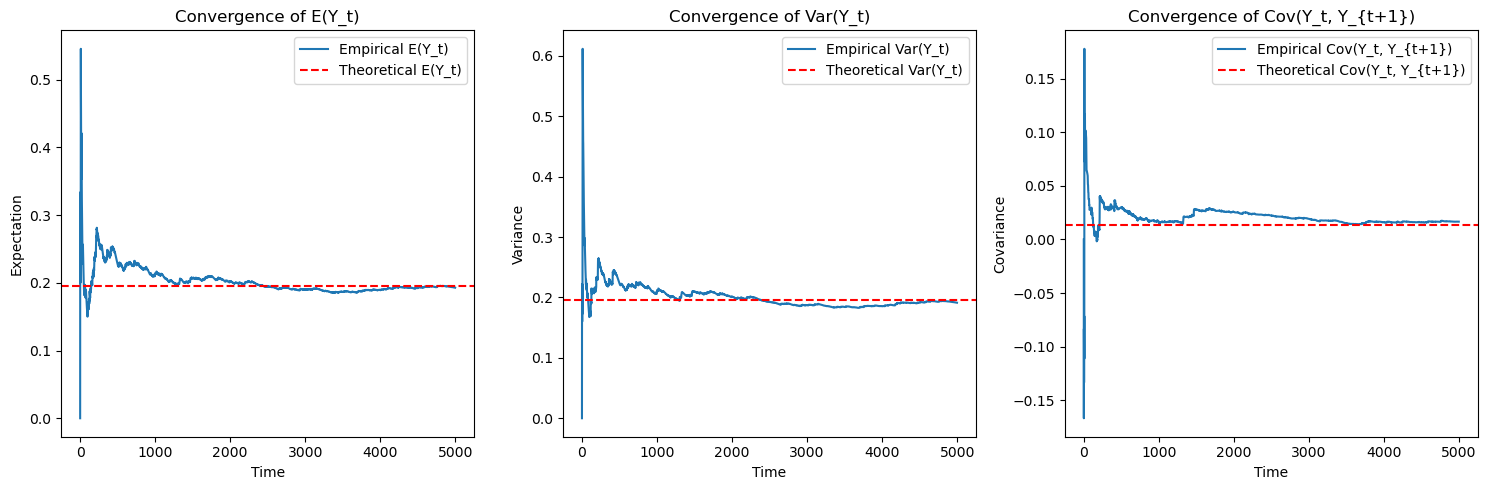

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
a = 0.063
b = 0.68
d = 0.05
n = 5000

# Initialize the process
Y = np.zeros(n)
lambda_t = np.zeros(n)
lambda_t[0] = d / (1 - a - b)  # Initial lambda based on stationary expectation
Y[0] = np.random.poisson(lambda_t[0])

# Lists to store the empirical values over time
E_Yt_empirical_list = []
Var_Yt_empirical_list = []
Cov_Yt_1_empirical_list = []

# Simulate the process
for t in range(1, n):
    lambda_t[t] = d + b * lambda_t[t-1] + a * Y[t-1]
    Y[t] = np.random.poisson(lambda_t[t])
    
    # Calculate and store empirical moments over time
    if t > 1:
        E_Yt_empirical_list.append(np.mean(Y[:t]))
        Var_Yt_empirical_list.append(np.var(Y[:t]))
        if t > 2:
            Cov_Yt_1_empirical_list.append(np.cov(Y[:t-1], Y[1:t])[0, 1])

# Compute the empirical moments for the entire series
E_Yt_empirical = np.mean(Y)
Var_Yt_empirical = np.var(Y)
Cov_Yt_h_empirical = [np.cov(Y[:-h], Y[h:])[0, 1] for h in range(1, 11)]

# Theoretical values
E_Yt_theoretical = d / (1 - a - b)
Var_Yt_theoretical = (d / (1 - a - b)) * ((1 - b**2 - 2 * a * b) / (1 - (a + b)**2))
Cov_Yt_h_theoretical = [(a * (1 - b * (a + b)) * (a + b)**(h-1) * d) / ((1 - a - b) * (1 - (a + b)**2)) for h in range(1, 11)]

# Print the results
print(f"Empirical E(Y_t) = {E_Yt_empirical}")
print(f"Empirical Var(Y_t) = {Var_Yt_empirical}")
for h, cov in enumerate(Cov_Yt_h_empirical, start=1):
    print(f"Empirical Cov(Y_t, Y_{t+h}) = {cov}")

print(f"Theoretical E(Y_t) = {E_Yt_theoretical}")
print(f"Theoretical Var(Y_t) = {Var_Yt_theoretical}")
for h, cov in enumerate(Cov_Yt_h_theoretical, start=1):
    print(f"Theoretical Cov(Y_t, Y_{t+h}) = {cov}")

# Plot the convergence of the empirical moments to the theoretical values
plt.figure(figsize=(15, 5))

# Convergence of Expectation
plt.subplot(1, 3, 1)
plt.plot(E_Yt_empirical_list, label='Empirical E(Y_t)')
plt.axhline(y=E_Yt_theoretical, color='r', linestyle='--', label='Theoretical E(Y_t)')
plt.xlabel('Time')
plt.ylabel('Expectation')
plt.title('Convergence of E(Y_t)')
plt.legend()

# Convergence of Variance
plt.subplot(1, 3, 2)
plt.plot(Var_Yt_empirical_list, label='Empirical Var(Y_t)')
plt.axhline(y=Var_Yt_theoretical, color='r', linestyle='--', label='Theoretical Var(Y_t)')
plt.xlabel('Time')
plt.ylabel('Variance')
plt.title('Convergence of Var(Y_t)')
plt.legend()

# Convergence of Covariance
plt.subplot(1, 3, 3)
plt.plot(Cov_Yt_1_empirical_list, label='Empirical Cov(Y_t, Y_{t+1})')
plt.axhline(y=Cov_Yt_h_theoretical[0], color='r', linestyle='--', label='Theoretical Cov(Y_t, Y_{t+1})')
plt.xlabel('Time')
plt.ylabel('Covariance')
plt.title('Convergence of Cov(Y_t, Y_{t+1})')
plt.legend()

plt.tight_layout()
plt.show()


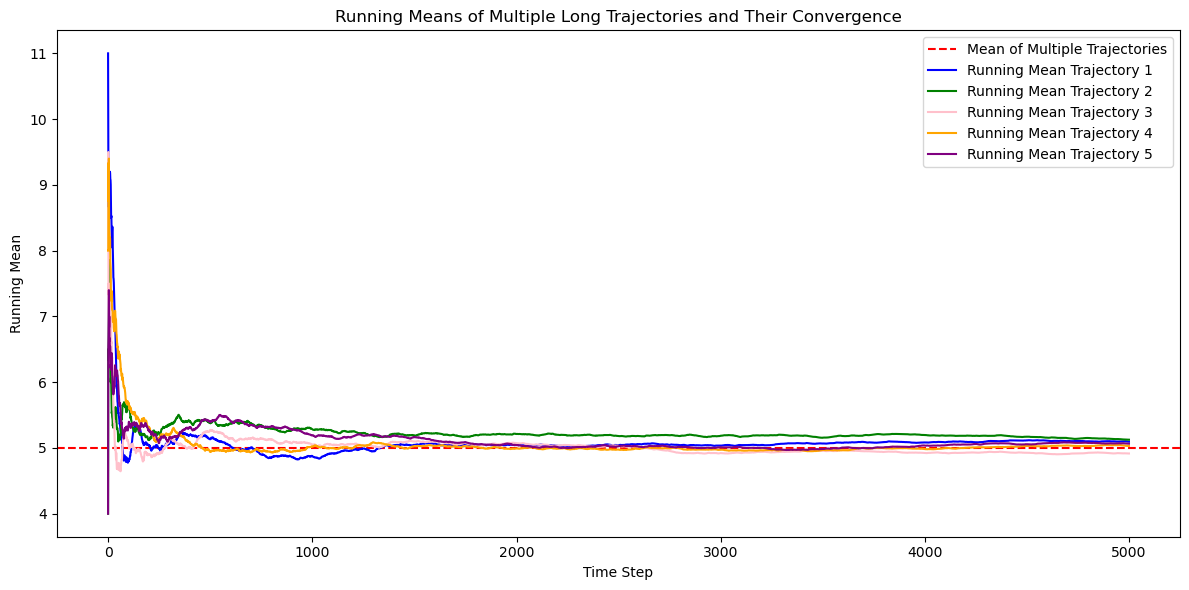

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# Parameters
d = 0.5
a = 0.1
b = 0.8

# Simulation settings
num_trajectories = 1000
time_point = 5000  # Specific time point for mean of multiple trajectories
long_time = 5000  # Length of each single long trajectory
num_long_trajectories = 5  # Number of single long trajectories

# Array to store end points of each trajectory at time_point
end_points = np.zeros(num_trajectories)

# Simulate multiple trajectories
for i in range(num_trajectories):
    lambda_t = 10  # Initial condition
    Y_t = np.random.poisson(lambda_t)
    for t in range(1, time_point + 1):
        lambda_t = d + b * lambda_t + a * Y_t
        Y_t = np.random.poisson(lambda_t)
    end_points[i] = Y_t

# Mean of the end points at time_point
mean_end_points = np.mean(end_points)

# Setup plot
plt.figure(figsize=(12, 6))
plt.title('Running Means of Multiple Long Trajectories and Their Convergence')
plt.xlabel('Time Step')
plt.ylabel('Running Mean')
plt.axhline(y=mean_end_points, color='r', linestyle='dashed', linewidth=1.5, label='Mean of Multiple Trajectories')

# Simulate several single long trajectories and plot their running averages
colors = ['blue', 'green', 'pink', 'orange', 'purple']
for i in range(num_long_trajectories):
    lambda_long = 10  # Initial condition for each trajectory
    Y_long = np.random.poisson(lambda_long)
    long_counts = np.zeros(long_time)

    for t in range(long_time):
        lambda_long = d + b * lambda_long + a * Y_long
        Y_long = np.random.poisson(lambda_long)
        long_counts[t] = Y_long

    # Calculate running average
    running_means_long = np.cumsum(long_counts) / np.arange(1, long_time + 1)
    plt.plot(running_means_long, label=f'Running Mean Trajectory {i+1}', color=colors[i % len(colors)])

plt.legend()
plt.tight_layout()
plt.show()


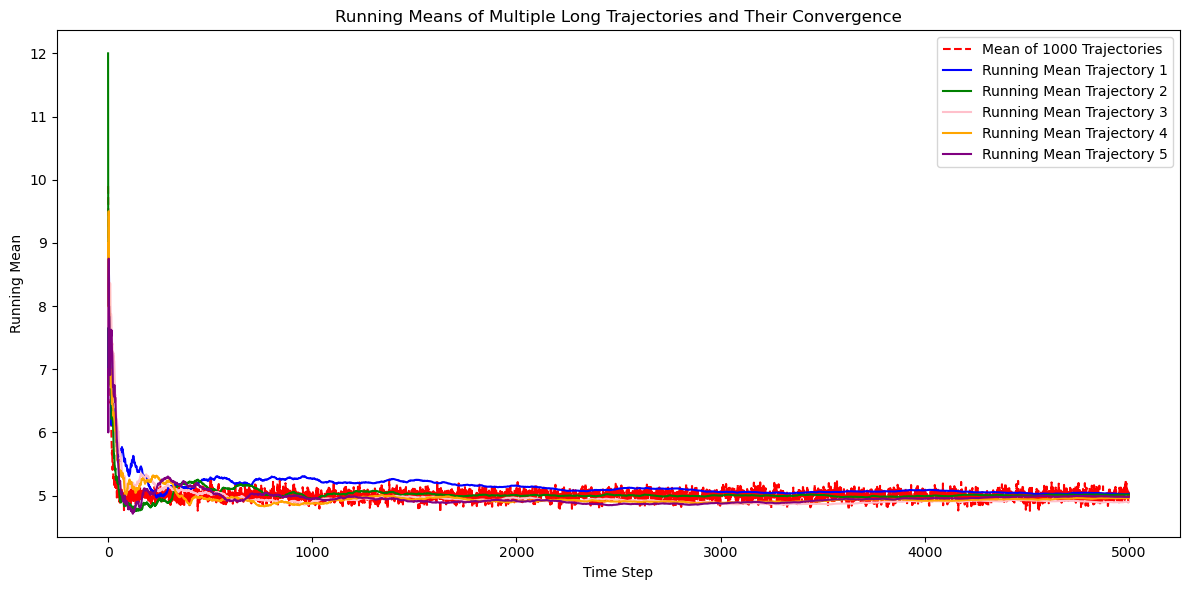

In [87]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
d = 0.5
a = 0.1
b = 0.8

# Simulation settings
num_trajectories = 1000
time_point = 5000  # Specific time point for mean of multiple trajectories
long_time = 5000  # Length of each single long trajectory
num_long_trajectories = 5  # Number of single long trajectories

# Arrays to store the values for all trajectories
all_trajectories = np.zeros((num_trajectories, time_point + 1))

# Simulate multiple trajectories
for i in range(num_trajectories):
    lambda_t = 10  # Initial condition
    Y_t = np.random.poisson(lambda_t)
    all_trajectories[i, 0] = Y_t
    for t in range(1, time_point + 1):
        lambda_t = d + b * lambda_t + a * Y_t
        Y_t = np.random.poisson(lambda_t)
        all_trajectories[i, t] = Y_t

# Calculate the mean of all trajectories at each time step
mean_over_time = np.mean(all_trajectories, axis=0)

# Setup plot
plt.figure(figsize=(12, 6))
plt.title('Running Means of Multiple Long Trajectories and Their Convergence')
plt.xlabel('Time Step')
plt.ylabel('Running Mean')
plt.plot(mean_over_time, color='red', linestyle='dashed', linewidth=1.5, label='Mean of 1000 Trajectories')

# Simulate several single long trajectories and plot their running averages
colors = ['blue', 'green', 'pink', 'orange', 'purple']
for i in range(num_long_trajectories):
    lambda_long = 10  # Initial condition for each trajectory
    Y_long = np.random.poisson(lambda_long)
    long_counts = np.zeros(long_time)

    for t in range(long_time):
        lambda_long = d + b * lambda_long + a * Y_long
        Y_long = np.random.poisson(lambda_long)
        long_counts[t] = Y_long

    # Calculate running average
    running_means_long = np.cumsum(long_counts) / np.arange(1, long_time + 1)
    plt.plot(running_means_long, label=f'Running Mean Trajectory {i+1}', color=colors[i % len(colors)])

plt.legend()
plt.tight_layout()
plt.show()


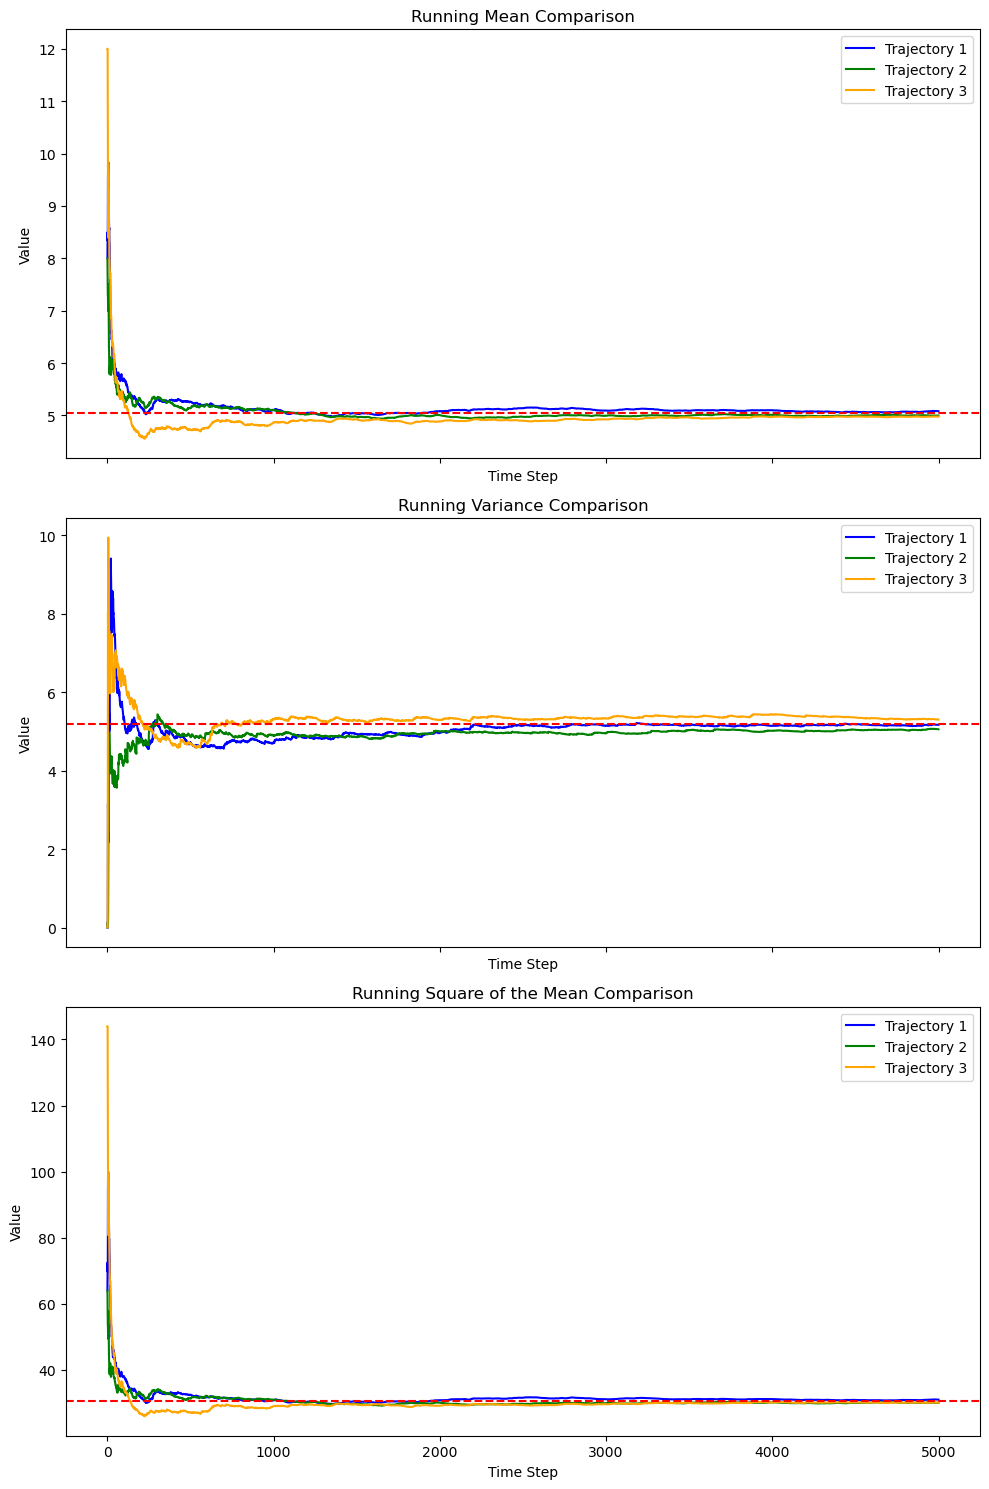

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
d = 0.5
a = 0.1
b = 0.8

# Simulation settings
num_trajectories = 1000
time_point = 1000
long_time = 5000
num_long_trajectories = 3  # Reduce for clarity in plots

# Arrays to store end points of each trajectory at time_point
end_points = np.zeros(num_trajectories)

# Simulate multiple trajectories
for i in range(num_trajectories):
    lambda_t = 10  # Initial condition
    Y_t = np.random.poisson(lambda_t)
    for t in range(1, time_point + 1):
        lambda_t = d + b * lambda_t + a * Y_t
        Y_t = np.random.poisson(lambda_t)
    end_points[i] = Y_t

# Mean, variance, and square of the mean at the endpoint
mean_end_points = np.mean(end_points)
variance_end_points = np.var(end_points)
square_mean_end_points = np.mean(end_points**2)

# Setup plot for three statistics
fig, axs = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Titles
axs[0].set_title('Running Mean Comparison')
axs[1].set_title('Running Variance Comparison')
axs[2].set_title('Running Square of the Mean Comparison')

# Simulate several single long trajectories
colors = ['blue', 'green', 'orange']
for i in range(num_long_trajectories):
    lambda_long = 10  # Initial condition for each trajectory
    Y_long = np.random.poisson(lambda_long)
    long_counts = np.zeros(long_time)

    for t in range(long_time):
        lambda_long = d + b * lambda_long + a * Y_long
        Y_long = np.random.poisson(lambda_long)
        long_counts[t] = Y_long

    # Calculate running averages
    running_means = np.cumsum(long_counts) / np.arange(1, long_time + 1)
    running_vars = np.cumsum((long_counts - running_means)**2) / np.arange(1, long_time + 1)
    running_square_means = np.cumsum(long_counts**2) / np.arange(1, long_time + 1)

    # Plotting
    axs[0].plot(running_means, label=f'Trajectory {i+1}', color=colors[i % len(colors)])
    axs[1].plot(running_vars, label=f'Trajectory {i+1}', color=colors[i % len(colors)])
    axs[2].plot(running_square_means, label=f'Trajectory {i+1}', color=colors[i % len(colors)])

# Reference lines from multiple trajectory statistics
axs[0].axhline(y=mean_end_points, color='r', linestyle='dashed', linewidth=1.5)
axs[1].axhline(y=variance_end_points, color='r', linestyle='dashed', linewidth=1.5)
axs[2].axhline(y=square_mean_end_points, color='r', linestyle='dashed', linewidth=1.5)

# Legends and labels
for ax in axs:
    ax.legend()
    ax.set_xlabel('Time Step')
    ax.set_ylabel('Value')

plt.tight_layout()
plt.show()


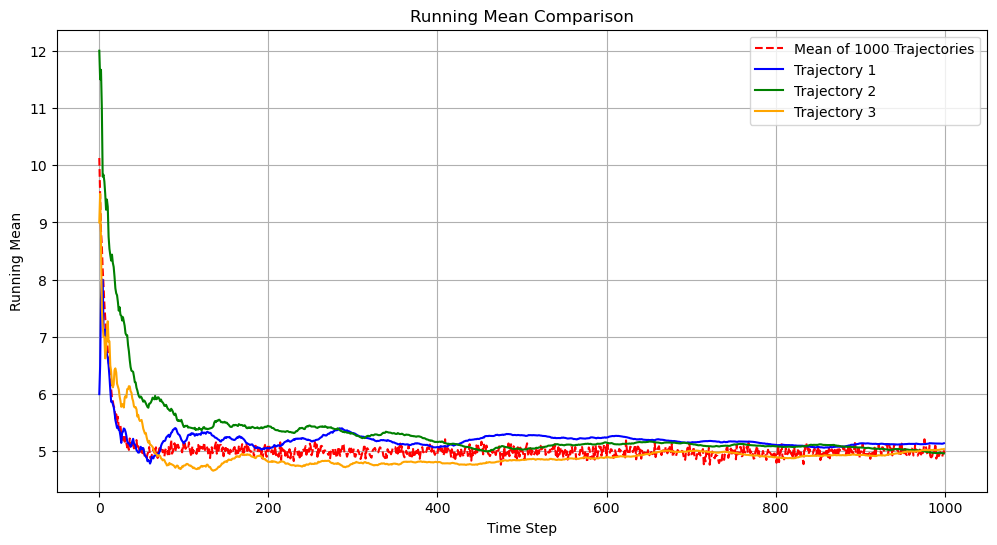

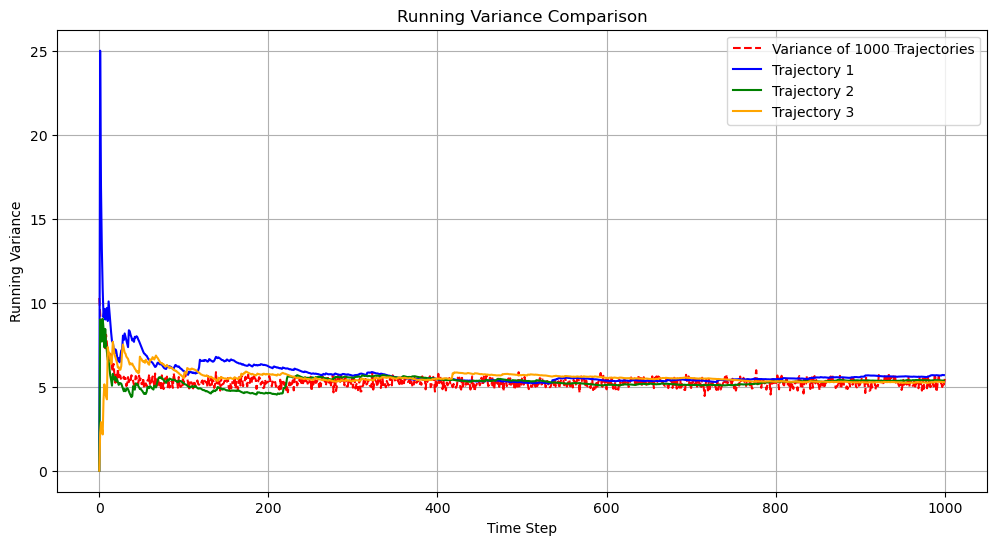

In [92]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
d = 0.5
a = 0.1
b = 0.8

# Simulation settings
num_trajectories = 1000
time_point = 1000
long_time = 1000
num_long_trajectories = 3  # Reduce for clarity in plots

# Arrays to store values of each trajectory at each time step
all_trajectories = np.zeros((num_trajectories, time_point + 1))

# Simulate multiple trajectories
for i in range(num_trajectories):
    lambda_t = 10  # Initial condition
    Y_t = np.random.poisson(lambda_t)
    all_trajectories[i, 0] = Y_t
    for t in range(1, time_point + 1):
        lambda_t = d + b * lambda_t + a * Y_t
        Y_t = np.random.poisson(lambda_t)
        all_trajectories[i, t] = Y_t

# Mean and variance over time
mean_over_time = np.mean(all_trajectories, axis=0)
variance_over_time = np.var(all_trajectories, axis=0)

# Plot mean over time
plt.figure(figsize=(12, 6))
plt.title('Running Mean Comparison')
plt.xlabel('Time Step')
plt.ylabel('Running Mean')
plt.plot(mean_over_time, label='Mean of 1000 Trajectories', color='red', linestyle='dashed', linewidth=1.5)

# Simulate several single long trajectories for mean
colors = ['blue', 'green', 'orange']
for i in range(num_long_trajectories):
    lambda_long = 10  # Initial condition for each trajectory
    Y_long = np.random.poisson(lambda_long)
    long_counts = np.zeros(long_time)

    for t in range(long_time):
        lambda_long = d + b * lambda_long + a * Y_long
        Y_long = np.random.poisson(lambda_long)
        long_counts[t] = Y_long

    # Calculate running averages
    running_means = np.cumsum(long_counts) / np.arange(1, long_time + 1)
    plt.plot(running_means, label=f'Trajectory {i+1}', color=colors[i % len(colors)])

plt.legend()
plt.grid(True)
plt.show()

# Plot variance over time
plt.figure(figsize=(12, 6))
plt.title('Running Variance Comparison')
plt.xlabel('Time Step')
plt.ylabel('Running Variance')
plt.plot(variance_over_time, label='Variance of 1000 Trajectories', color='red', linestyle='dashed', linewidth=1.5)

# Simulate several single long trajectories for variance
for i in range(num_long_trajectories):
    lambda_long = 10  # Initial condition for each trajectory
    Y_long = np.random.poisson(lambda_long)
    long_counts = np.zeros(long_time)

    for t in range(long_time):
        lambda_long = d + b * lambda_long + a * Y_long
        Y_long = np.random.poisson(lambda_long)
        long_counts[t] = Y_long

    # Calculate running variances
    running_vars = np.array([np.var(long_counts[:t+1]) for t in range(long_time)])
    plt.plot(running_vars, label=f'Trajectory {i+1}', color=colors[i % len(colors)])

plt.legend()
plt.grid(True)
plt.show()


Approximate Expectation E(Y_t): 0.19681
Theoretical Expectation E(Y_t): 0.19455252918287938


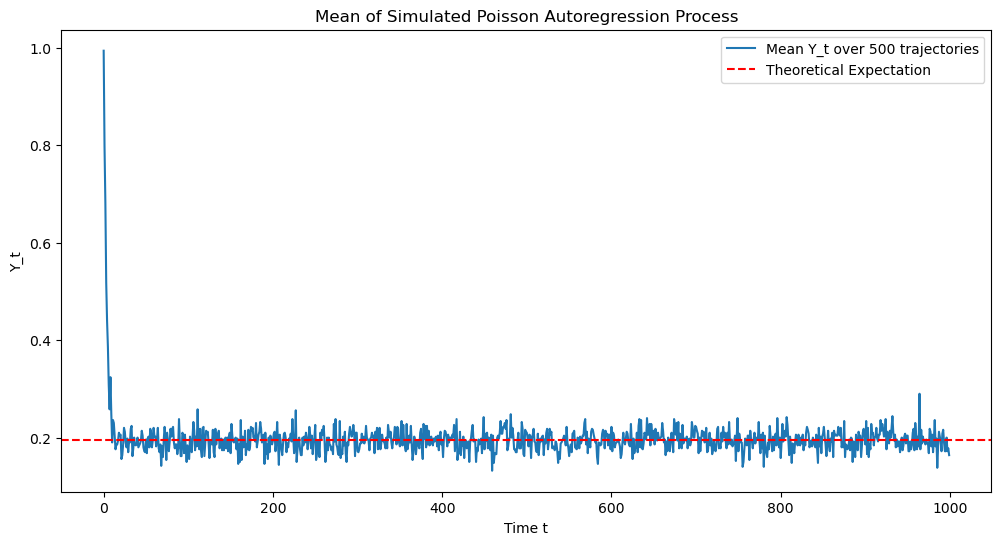

In [15]:
import numpy as np
import matplotlib.pyplot as plt
# MORT CARLO 500 条新办法
# Constants
d = 0.05
a = 0.063
b = 0.68
T = 1000  # Length of the time series
num_trajectories = 500

# Theoretical expectation
theoretical_expectation = d / (1 - a - b)

# Arrays to store the values for all trajectories
all_Ys = np.zeros((num_trajectories, T))

# Function to simulate a single trajectory
def simulate_trajectory():
    lambdas = np.zeros(T)
    Ys = np.zeros(T)

    # Initial values
    lambdas[0] = 1
    Ys[0] = np.random.poisson(lambdas[0])

    # Simulate the process
    for t in range(1, T):
        lambdas[t] = d + b * lambdas[t-1] + a * Ys[t-1]
        Ys[t] = np.random.poisson(lambdas[t])
    
    return Ys

# Simulate multiple trajectories
for i in range(num_trajectories):
    all_Ys[i, :] = simulate_trajectory()

# Calculate the mean of all trajectories at each time step
mean_Ys = np.mean(all_Ys, axis=0)

# Approximate the expectation of Y_t
approximate_expectation = np.mean(mean_Ys)

# Compare with the theoretical expectation
print(f"Approximate Expectation E(Y_t): {approximate_expectation}")
print(f"Theoretical Expectation E(Y_t): {theoretical_expectation}")

# Plot the mean trajectory
plt.figure(figsize=(12, 6))
plt.plot(mean_Ys, label="Mean Y_t over 500 trajectories")
plt.axhline(y=theoretical_expectation, color='r', linestyle='--', label="Theoretical Expectation")
plt.xlabel("Time t")
plt.ylabel("Y_t")
plt.title("Mean of Simulated Poisson Autoregression Process")
plt.legend()
plt.show()


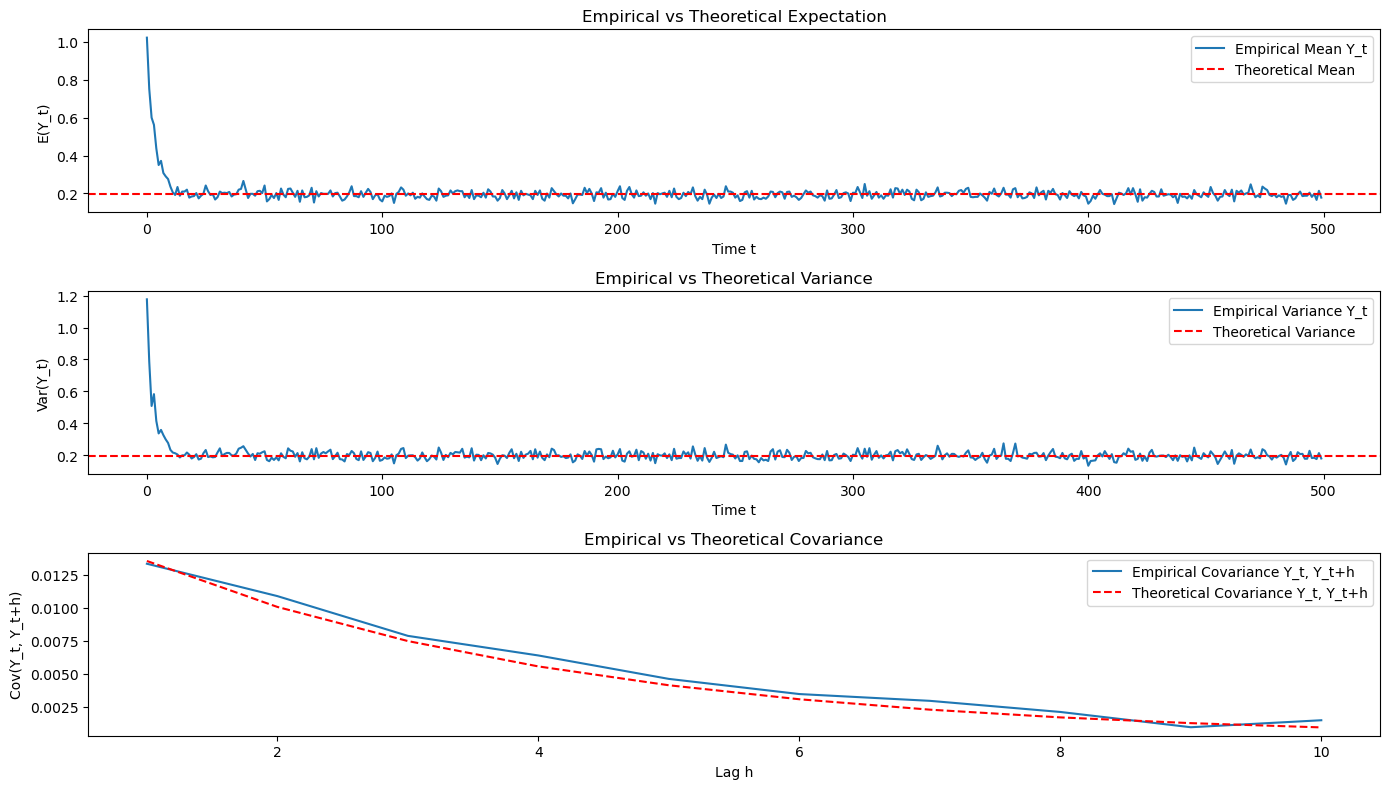

Approximate Expectation E(Y_t): 0.200172
Theoretical Expectation E(Y_t): 0.19455252918287938
Approximate Variance Var(Y_t): 0.20226691999999974
Theoretical Variance Var(Y_t): 0.19627633153699145
Approximate Covariances Cov(Y_t, Y_t+h): [0.01332992236978968, 0.010877844041496646, 0.007867437087454587, 0.00638253119141509, 0.004607607133458836, 0.0034601105044096297, 0.0029465177820143336, 0.002103646317024292, 0.0009472631617614056, 0.0014762668193529919]
Theoretical Covariances Cov(Y_t, Y_t+h): [0.013537594487626658, 0.010058432704306605, 0.007473415499299809, 0.005552747715979759, 0.004125691552972962, 0.0030653888238589113, 0.0022775838961271713, 0.0016922448348224883, 0.0012573379122731091, 0.0009342020688189203]


In [9]:
import numpy as np
import matplotlib.pyplot as plt
# 用新办法画COV VAR的CONVERGENCE
# Constants
d = 0.05
a = 0.063
b = 0.68
T = 500  # Length of the time series
num_trajectories = 500

# Theoretical values
E_Yt_theoretical = d / (1 - a - b)
Var_Yt_theoretical = (d / (1 - a - b)) * ((1 - b**2 - 2 * a * b) / (1 - (a + b)**2))
Cov_Yt_h_theoretical = [(a * (1 - b * (a + b)) * (a + b)**(h-1) * d) / ((1 - a - b) * (1 - (a + b)**2)) for h in range(1, 11)]

# Arrays to store the values for all trajectories
all_Ys = np.zeros((num_trajectories, T))

# Function to simulate a single trajectory
def simulate_trajectory():
    lambdas = np.zeros(T)
    Ys = np.zeros(T)

    # Initial values
    lambdas[0] = 1
    Ys[0] = np.random.poisson(lambdas[0])

    # Simulate the process
    for t in range(1, T):
        lambdas[t] = d + b * lambdas[t-1] + a * Ys[t-1]
        Ys[t] = np.random.poisson(lambdas[t])
    
    return Ys

# Simulate multiple trajectories
for i in range(num_trajectories):
    all_Ys[i, :] = simulate_trajectory()

# Calculate empirical mean and variance of Y_t
mean_Ys = np.mean(all_Ys, axis=0)
variance_Ys = np.var(all_Ys, axis=0)

# Calculate empirical covariances Cov(Y_t, Y_t+h) for h in range(1, 11)
covariances_Yt_h = []
for h in range(1, 11):
    covariances = [np.cov(all_Ys[:, t], all_Ys[:, t+h])[0, 1] for t in range(T-h)]
    covariances_Yt_h.append(np.mean(covariances))

# Average empirical values over all time steps
approximate_expectation = np.mean(mean_Ys)
approximate_variance = np.mean(variance_Ys)
approximate_covariances = covariances_Yt_h

# Plotting the results
plt.figure(figsize=(14, 8))

# Expectation
plt.subplot(3, 1, 1)
plt.plot(mean_Ys, label="Empirical Mean Y_t")
plt.axhline(y=E_Yt_theoretical, color='r', linestyle='--', label="Theoretical Mean")
plt.xlabel("Time t")
plt.ylabel("E(Y_t)")
plt.legend()
plt.title("Empirical vs Theoretical Expectation")

# Variance
plt.subplot(3, 1, 2)
plt.plot(variance_Ys, label="Empirical Variance Y_t")
plt.axhline(y=Var_Yt_theoretical, color='r', linestyle='--', label="Theoretical Variance")
plt.xlabel("Time t")
plt.ylabel("Var(Y_t)")
plt.legend()
plt.title("Empirical vs Theoretical Variance")

# Covariance
plt.subplot(3, 1, 3)
plt.plot(range(1, 11), approximate_covariances, label="Empirical Covariance Y_t, Y_t+h")
plt.plot(range(1, 11), Cov_Yt_h_theoretical, 'r--', label="Theoretical Covariance Y_t, Y_t+h")
plt.xlabel("Lag h")
plt.ylabel("Cov(Y_t, Y_t+h)")
plt.legend()
plt.title("Empirical vs Theoretical Covariance")

plt.tight_layout()
plt.show()

# Print the results
print(f"Approximate Expectation E(Y_t): {approximate_expectation}")
print(f"Theoretical Expectation E(Y_t): {E_Yt_theoretical}")
print(f"Approximate Variance Var(Y_t): {approximate_variance}")
print(f"Theoretical Variance Var(Y_t): {Var_Yt_theoretical}")
print("Approximate Covariances Cov(Y_t, Y_t+h):", approximate_covariances)
print("Theoretical Covariances Cov(Y_t, Y_t+h):", Cov_Yt_h_theoretical)


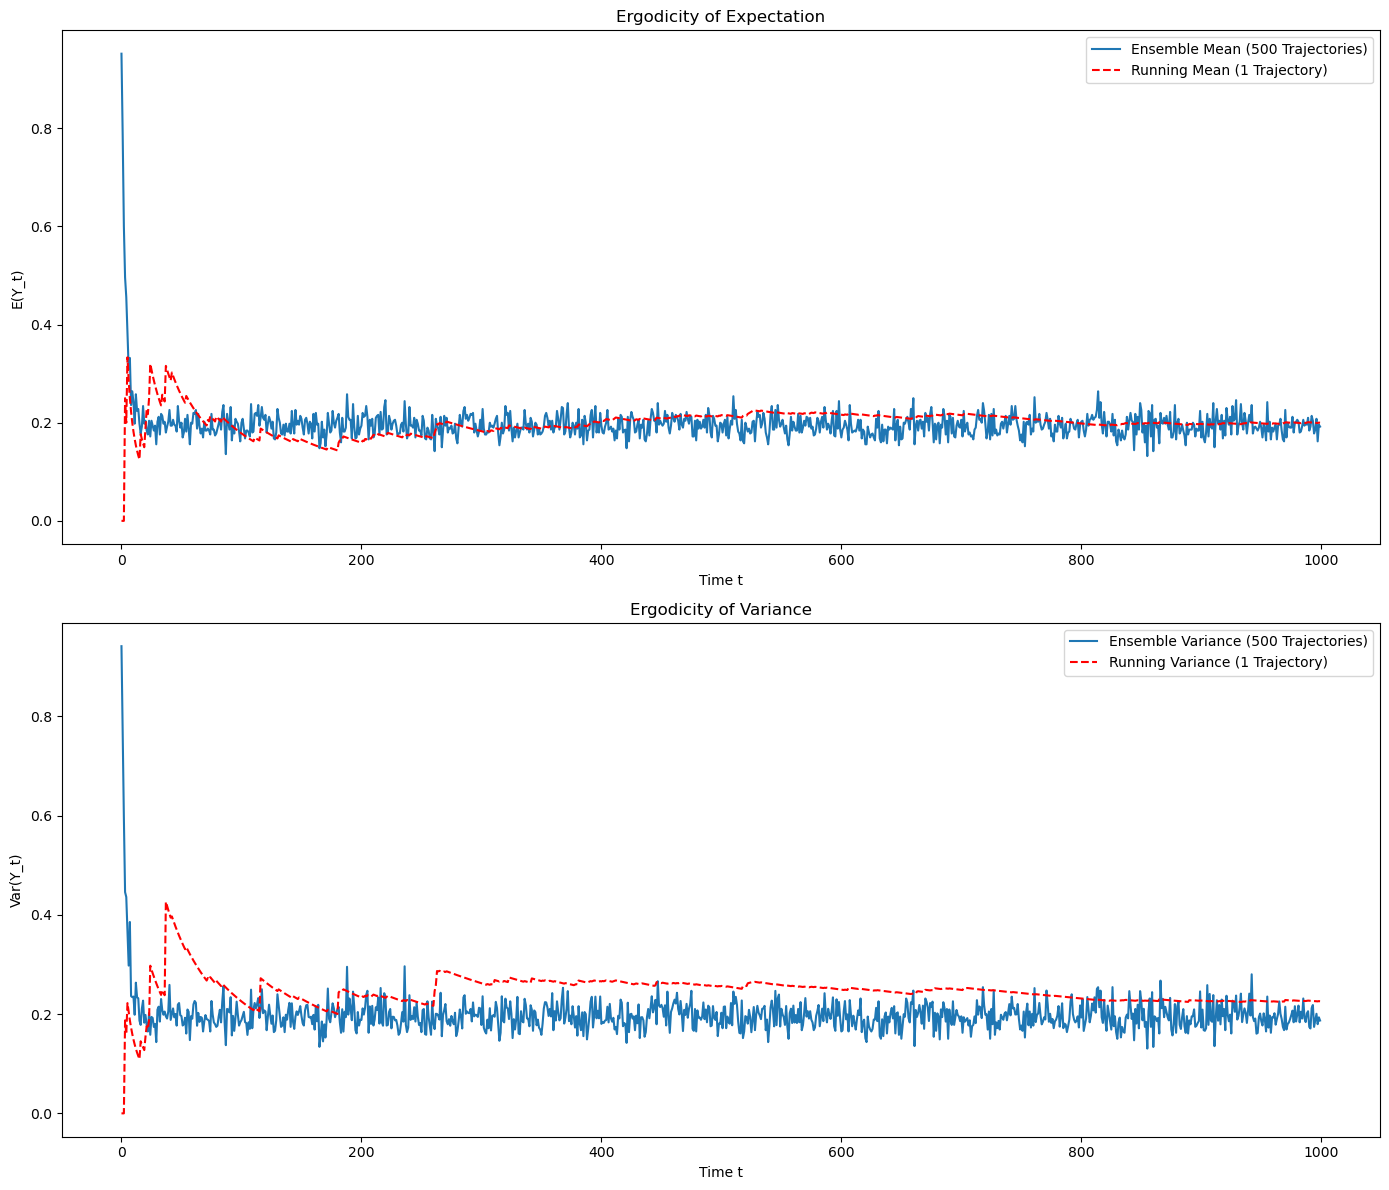

In [47]:
import numpy as np
import matplotlib.pyplot as plt
# Constants
d = 0.05
a = 0.063
b = 0.68
T = 1000  # Length of the time series
num_trajectories = 500

# Function to simulate a single trajectory
def simulate_trajectory():
    lambdas = np.zeros(T)
    Ys = np.zeros(T)

    # Initial values
    lambdas[0] = 1
    Ys[0] = np.random.poisson(lambdas[0])

    # Simulate the process
    for t in range(1, T):
        lambdas[t] = d + b * lambdas[t-1] + a * Ys[t-1]
        Ys[t] = np.random.poisson(lambdas[t])
    
    return Ys

# Simulate multiple trajectories
all_Ys = np.zeros((num_trajectories, T))
for i in range(num_trajectories):
    all_Ys[i, :] = simulate_trajectory()

# Calculate the mean of all trajectories at each time step (ensemble average)
mean_Ys_over_trajectories = np.mean(all_Ys, axis=0)

# Calculate the variance of all trajectories at each time step (ensemble variance)
variance_Ys_over_trajectories = np.var(all_Ys, axis=0)

# Simulate a single trajectory
single_trajectory = simulate_trajectory()

# Calculate the running mean of the single trajectory
running_mean_single_trajectory = np.cumsum(single_trajectory) / np.arange(1, T+1)

# Calculate the running variance of the single trajectory
running_variance_single_trajectory = np.array([np.var(single_trajectory[:t+1]) for t in range(T)])

# Plot the mean and variance trajectories
plt.figure(figsize=(14, 12))

# Plotting the Expectations
plt.subplot(2, 1, 1)
plt.plot(mean_Ys_over_trajectories, label="Ensemble Mean (500 Trajectories)")
plt.plot(running_mean_single_trajectory, 'r--', label="Running Mean (1 Trajectory)")
plt.xlabel("Time t")
plt.ylabel("E(Y_t)")
plt.legend()
plt.title("Ergodicity of Expectation")

# Plotting the Variances
plt.subplot(2, 1, 2)
plt.plot(variance_Ys_over_trajectories, label="Ensemble Variance (500 Trajectories)")
plt.plot(running_variance_single_trajectory, 'r--', label="Running Variance (1 Trajectory)")
plt.xlabel("Time t")
plt.ylabel("Var(Y_t)")
plt.legend()
plt.title("Ergodicity of Variance")

plt.tight_layout()
plt.show()

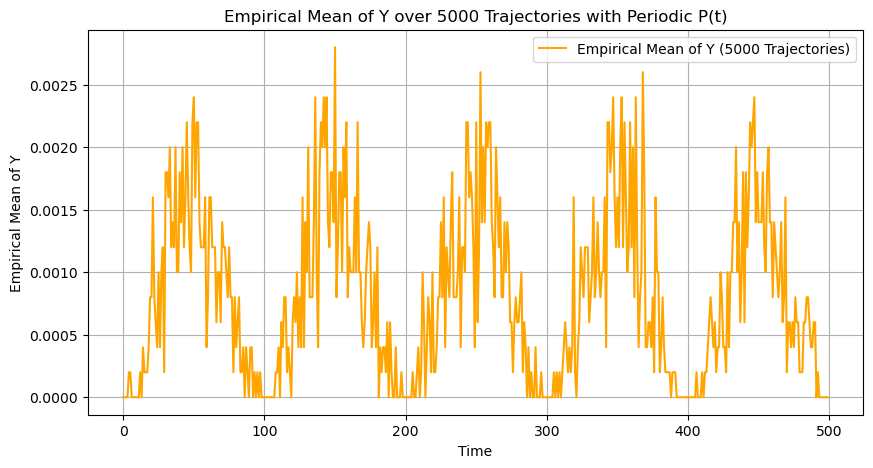

In [86]:
import numpy as np
import matplotlib.pyplot as plt

# Define the periodic function P(t)
def p_t_function(t):
    return (0.1*np.sin(0.01*t*np.pi))**2

# Parameters
a = 0.063
b = 0.68
d = 0.05
n = 500  # Number of time steps

# Function to simulate one trajectory
def simulate_trajectory():
    # Initialize arrays
    Y = np.zeros(n)
    lambda_t = np.zeros(n)

    # Initial lambda based on stationary expectation
    lambda_t[0] = d / (1 - a - b)

    # Initial Y based on Poisson distribution
    Y[0] = np.random.poisson(p_t_function(0) * lambda_t[0])

    # Simulation loop
    for t in range(1, n):
        lambda_t[t] = d + b * lambda_t[t-1] + a * Y[t-1]
        Y[t] = np.random.poisson(p_t_function(t) * lambda_t[t])

    return Y

# Simulate one trajectory
Y_single_trajectory = simulate_trajectory()

# Function to simulate multiple trajectories and average them
def simulate_multiple_trajectories(num_trajectories):
    all_trajectories = np.zeros((num_trajectories, n))
    for i in range(num_trajectories):
        all_trajectories[i, :] = simulate_trajectory()
    
    # Calculate the empirical mean across all trajectories
    empirical_mean_Y = np.mean(all_trajectories, axis=0)
    return empirical_mean_Y

# Number of trajectories to simulate
num_trajectories = 5000

# Simulate and compute the average
empirical_mean_Y_multiple = simulate_multiple_trajectories(num_trajectories)

# Plotting the empirical mean of multiple trajectories
plt.figure(figsize=(10, 5))
plt.plot(empirical_mean_Y_multiple, label='Empirical Mean of Y (5000 Trajectories)', color='orange')
plt.xlabel('Time')
plt.ylabel('Empirical Mean of Y')
plt.title('Empirical Mean of Y over 5000 Trajectories with Periodic P(t)')
plt.legend()
plt.grid(True)
plt.show()


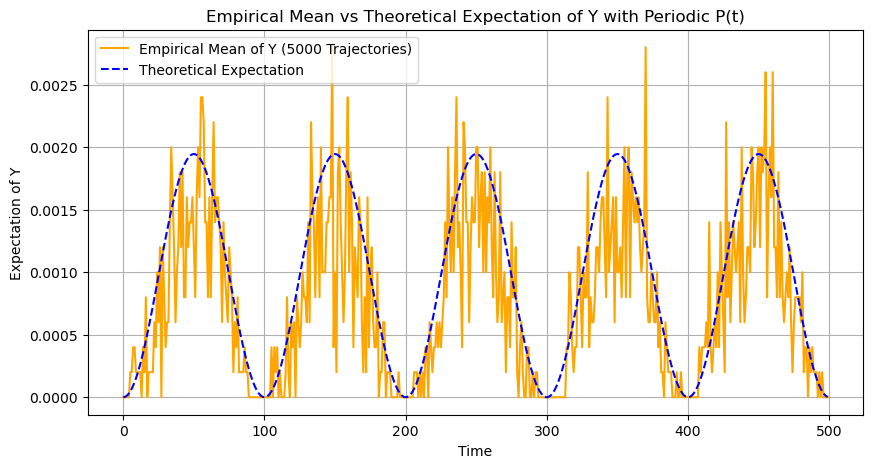

In [85]:
import numpy as np
import matplotlib.pyplot as plt

# Define the periodic function P(t)
def p_t_function(t):
    return (0.1 * np.sin(0.01 * t * np.pi))**2

# Parameters
a = 0.063
b = 0.68
d = 0.05
n = 500  # Number of time steps

# Function to simulate one trajectory
def simulate_trajectory():
    # Initialize arrays
    Y = np.zeros(n)
    lambda_t = np.zeros(n)

    # Initial lambda based on stationary expectation
    lambda_t[0] = d / (1 - a - b)

    # Initial Y based on Poisson distribution
    Y[0] = np.random.poisson(p_t_function(0) * lambda_t[0])

    # Simulation loop
    for t in range(1, n):
        lambda_t[t] = d + b * lambda_t[t-1] + a * Y[t-1]
        Y[t] = np.random.poisson(p_t_function(t) * lambda_t[t])

    return Y

# Simulate one trajectory
Y_single_trajectory = simulate_trajectory()

# Function to simulate multiple trajectories and average them
def simulate_multiple_trajectories(num_trajectories):
    all_trajectories = np.zeros((num_trajectories, n))
    for i in range(num_trajectories):
        all_trajectories[i, :] = simulate_trajectory()
    
    # Calculate the empirical mean across all trajectories
    empirical_mean_Y = np.mean(all_trajectories, axis=0)
    return empirical_mean_Y

# Number of trajectories to simulate
num_trajectories = 5000

# Simulate and compute the average
empirical_mean_Y_multiple = simulate_multiple_trajectories(num_trajectories)

# Calculate the theoretical expectation
theoretical_expectation = p_t_function(np.arange(n)) * (d / (1 - a - b))

# Plotting the empirical mean of multiple trajectories and theoretical expectation
plt.figure(figsize=(10, 5))
plt.plot(empirical_mean_Y_multiple, label='Empirical Mean of Y (5000 Trajectories)', color='orange')
plt.plot(theoretical_expectation, label='Theoretical Expectation', color='blue', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Expectation of Y')
plt.title('Empirical Mean vs Theoretical Expectation of Y with Periodic P(t)')
plt.legend()
plt.grid(True)
plt.show()


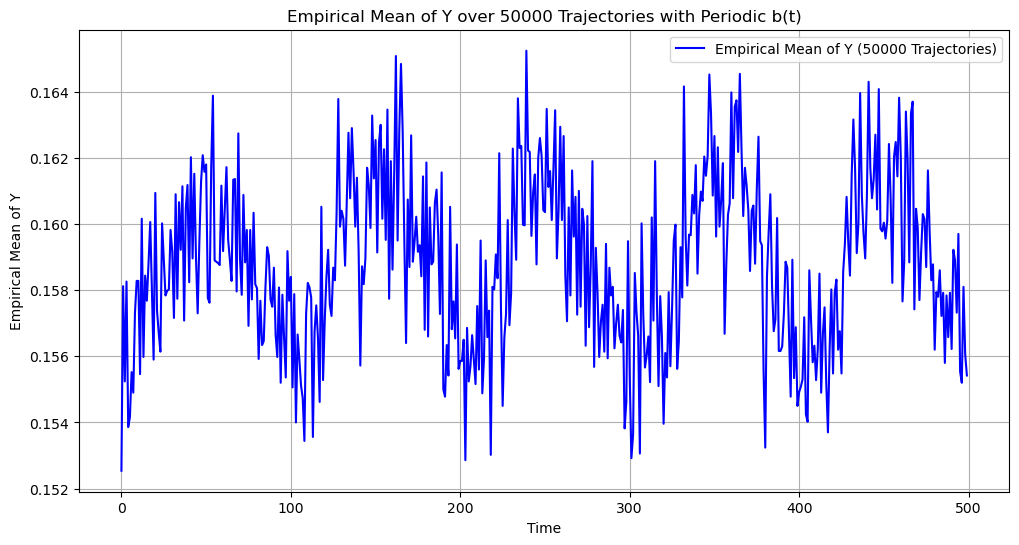

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the periodic function P(t)
def a_t_function(t):
    return (0.1*np.sin(0.01*t*np.pi))**2

# Parameters
a = 0.063
b = 0.68
d = 0.05
n = 500  # Number of time steps

# Function to simulate one trajectory
def simulate_trajectory():
    # Initialize arrays
    Y = np.zeros(n)
    lambda_t = np.zeros(n)

    # Initial lambda based on stationary expectation
    lambda_t[0] = d / (1 - a_t_function(0) - b)

    # Initial Y based on Poisson distribution
    Y[0] = np.random.poisson(lambda_t[0])

    # Simulation loop
    for t in range(1, n):
        lambda_t[t] = d + b * lambda_t[t-1] + a_t_function(t) * Y[t-1]
        Y[t] = np.random.poisson(lambda_t[t])

    return Y

# Simulate one trajectory
Y_single_trajectory = simulate_trajectory()

# Function to simulate multiple trajectories and average them
def simulate_multiple_trajectories(num_trajectories):
    all_trajectories = np.zeros((num_trajectories, n))
    for i in range(num_trajectories):
        all_trajectories[i, :] = simulate_trajectory()
    
    # Calculate the empirical mean across all trajectories
    empirical_mean_Y = np.mean(all_trajectories, axis=0)
    return empirical_mean_Y

# Number of trajectories to simulate
num_trajectories = 50000

# Simulate and compute the average
empirical_mean_Y_multiple = simulate_multiple_trajectories(num_trajectories)

# Plotting the empirical mean of multiple trajectories
plt.figure(figsize=(12, 6))
plt.plot(empirical_mean_Y_multiple, label='Empirical Mean of Y (50000 Trajectories)', color='blue')
plt.xlabel('Time')
plt.ylabel('Empirical Mean of Y')
plt.title('Empirical Mean of Y over 50000 Trajectories with Periodic b(t)')
plt.legend()
plt.grid(True)
plt.show()


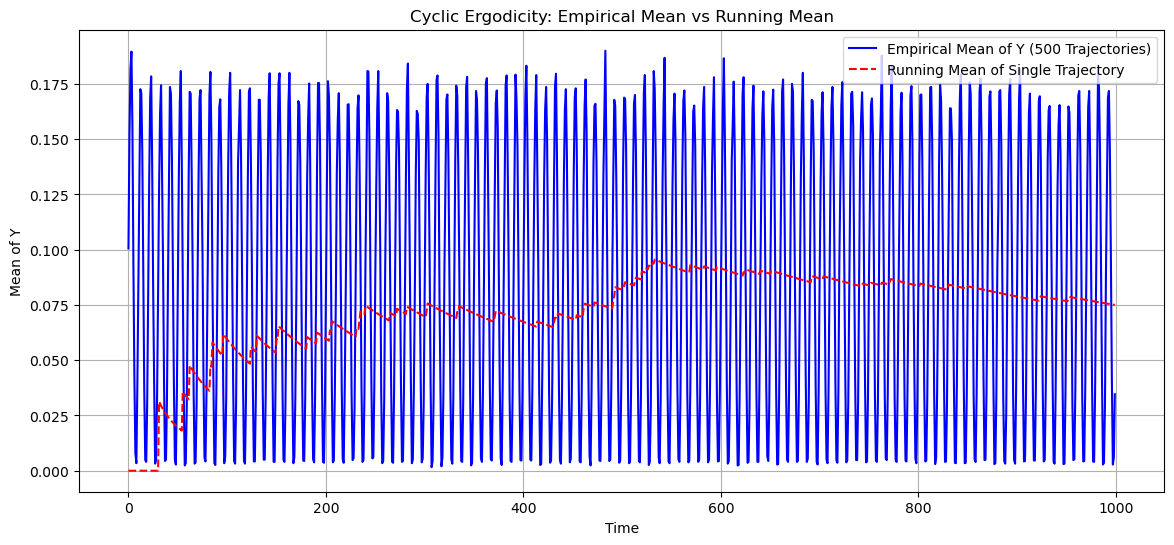

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Define the periodic function P(t)
def p_t_function(t):
    return (1 + np.sin(2 * np.pi * t / 10)) / 2

# Parameters
a = 0.063
b = 0.68
d = 0.05
n = 1000  # Number of time steps

# Function to simulate one trajectory
def simulate_trajectory():
    # Initialize arrays
    Y = np.zeros(n)
    lambda_t = np.zeros(n)

    # Initial lambda based on stationary expectation
    lambda_t[0] = d / (1 - a - b)

    # Initial Y based on Poisson distribution
    Y[0] = np.random.poisson(p_t_function(0) * lambda_t[0])

    # Simulation loop
    for t in range(1, n):
        lambda_t[t] = d + b * lambda_t[t-1] + a * Y[t-1]
        Y[t] = np.random.poisson(p_t_function(t) * lambda_t[t])

    return Y

# Simulate one trajectory
Y_single_trajectory = simulate_trajectory()

# Function to simulate multiple trajectories and average them
def simulate_multiple_trajectories(num_trajectories):
    all_trajectories = np.zeros((num_trajectories, n))
    for i in range(num_trajectories):
        all_trajectories[i, :] = simulate_trajectory()
    
    # Calculate the empirical mean across all trajectories
    empirical_mean_Y = np.mean(all_trajectories, axis=0)
    return empirical_mean_Y

# Number of trajectories to simulate
num_trajectories = 5000

# Simulate and compute the average
empirical_mean_Y_multiple = simulate_multiple_trajectories(num_trajectories)

# Calculate the running mean of the single trajectory
running_mean_single_trajectory = np.cumsum(Y_single_trajectory) / np.arange(1, n+1)

# Plotting the empirical mean of multiple trajectories and the running mean of a single trajectory
plt.figure(figsize=(14, 6))

# Plotting the empirical mean of multiple trajectories
plt.plot(empirical_mean_Y_multiple, label='Empirical Mean of Y (500 Trajectories)', color='blue')
# Plotting the running mean of the single trajectory
plt.plot(running_mean_single_trajectory, 'r--', label='Running Mean of Single Trajectory')
plt.xlabel('Time')
plt.ylabel('Mean of Y')
plt.title('Cyclic Ergodicity: Empirical Mean vs Running Mean')
plt.legend()
plt.grid(True)
plt.show()

